## اضافه کردن کتابخانه‌های مورد نیاز

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## خواندن داده
فایل‌های `boys.csv` و `girls.csv` که داخل همین پوشه قرار دارند را بخوانید.
- دقت کنید برای جداسازی مقادیر در این فایل‌ها به جای `,` از `tab` استفاده شده است.
- در داده‌ها روز ۰ وجود دارد که منظور هنگام به دنیا آمدن نوزاد است.

In [27]:
girls_df = pd.read_csv('girls.csv', delimiter = '\t')
boys_df = pd.read_csv('boys.csv', delimiter = '\t')
boys_df.tail()

Day  L         M        S     P01      P1       P3       P5      P10  \
1852  1852  1  110.4253  0.04224  96.011  99.574  101.653  102.753  104.448   
1853  1853  1  110.4432  0.04225  96.023  99.588  101.667  102.768  104.463   
1854  1854  1  110.4611  0.04225  96.039  99.604  101.683  102.785  104.480   
1855  1855  1  110.4790  0.04225  96.055  99.620  101.700  102.801  104.497   
1856  1856  1  110.4969  0.04226  96.067  99.634  101.714  102.816  104.513   

          P15      P25      P50      P75      P85      P90      P95      P97  \
1852  105.591  107.279  110.425  113.571  115.260  116.403  118.097  119.198   
1853  105.607  107.296  110.443  113.591  115.279  116.423  118.118  119.219   
1854  105.624  107.313  110.461  113.609  115.298  116.442  118.138  119.239   
1855  105.641  107.331  110.479  113.627  115.317  116.461  118.157  119.258   
1856  105.657  107.347  110.497  113.646  115.337  116.481  118.178  119.279   

          P99     P999  
1852  121.276  124.839  
1853  121.298  124.863  
1854  121.318  124.883  
1855  121.338  124.903  
1856  121.360  124.927

در هر دو دیتافریم شامل اطلاعات پسران و دختران، دو ستون با نام‌های `P01` و `P999` قرار دارند که نشان دهنده هزارک اول و آخر هستند.
اما در اینجا ما با صدک‌ها سر و کار داریم بنابراین برای هماهنگی با بقیه ستون‌ها این دو ستون را به ترتیب به
`P0.1`
و
`P99.9`
تغییر نام دهید.

In [20]:
col_names = list(girls_df.columns)
col_names[4], col_names[-1] = 'P0.1', 'P99.9'
girls_df.columns = col_names
boys_df.columns = col_names

## تصویرسازی
نمودار صدک‌های **قد(به سانتی‌متر)** بر حسب **سن(به سال)** را رسم کنید. نمودار شما باید چیزی شبیه به نمو‌دار زیر شود.
- در داده‌ها سن به روز محاسبه شده و باید آن را تبدیل به سال کنید تا مقیاس نمودار صحیح شود.
- فقط ستون‌هایی که اسمشان با `P` شروع می‌شود نشان دهنده صدک‌ها هستند.
- برای هر کدام از صدک‌ها می‌توانید یک نمودار نقطه‌ای بکشید و رنگش را بر حسب فاصله‌ی آن از میانه تغییر دهید.
- به شکل زیر می‌توان از `colormap` های کتابخانه‌ی `matplotlib` برای تولید طیف رنگ مورد نیاز برای نمودار این قسمت استفاده کرد.
```python
colors = plt.cm.RdYlGn_r(np.abs(np.linspace(-1, 1, 15)))
```

Text(0.5, 1.0, 'Height by Age percentiles')

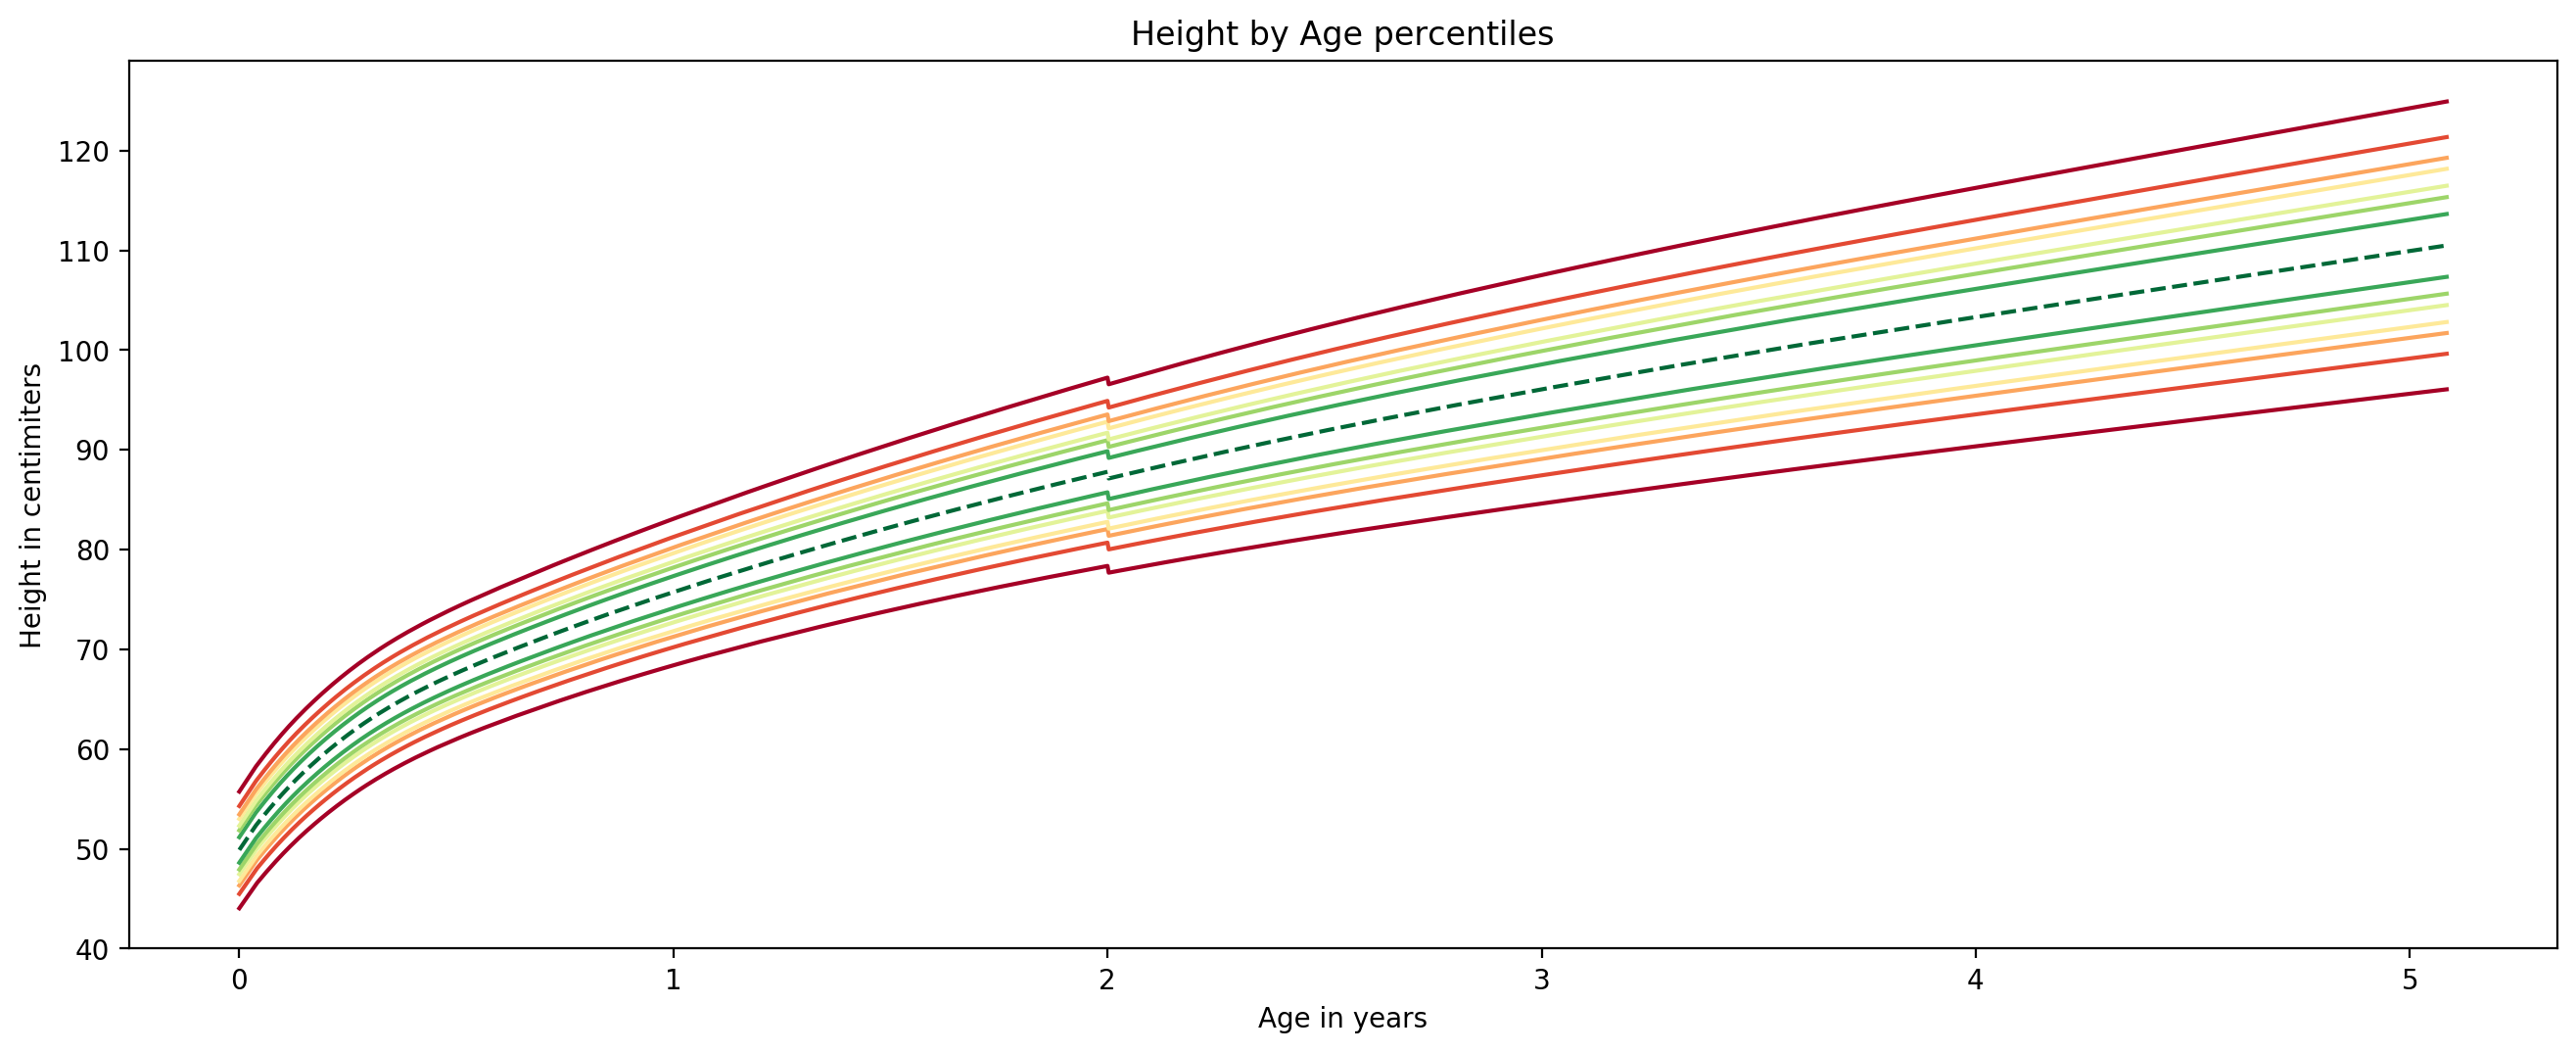

تابع `is_normal` را مانند شکل زیر تکمیل کنید تا در صورت طبیعی بودن وضعیت قد یک کودک `True` و در غیر این‌صورت `False` برگرداند.
- `boys_df` و `girls_df` داده‌های قرار داده‌شده در کنار سوال هستند. که در ابتدای این نوت‌بوک خواندید.
- در صورتی وضعیت قد طبیعی است که بیشتر یا مساوی صدک ۱۵ ام و کمتر از صدک ۸۵ ام باشد.
- `gender` مقداری برابر با `male` یا `female` دارد.
- پس از تکمیل تابع آن را در فایل `functions.py` ذخیره کنید. می‌توانید این کار را با قرار دادن مجیک `%%writefile functions.py` در خط اول سلول انجام دهید.

In [60]:
def is_normal(boys_df,girls_df,age_in_days,height_in_cm,gender):
    P15, P85 = None, None
    
    if gender == 'male':
        record = boys_df[boys_df['Day'] == age_in_days]        
    else:
        record = girls_df[boys_df['Day'] == age_in_days]
    
    P15, P85 = float(record['P15']), float(record['P85'])
        
    return P15 <= height_in_cm < P85

برای تست کردن تابع خود می‌توانید خطوط زیر را اجرا کنید.

In [61]:
assert is_normal(boys_df,girls_df,1500,108.442,'male')

In [62]:
assert is_normal(boys_df,girls_df,1500,108.443,'male') == False